##  The project is centered on conducting an exploratory data analysis (EDA) on Airbnb listings within a London city. Its aim is to dissect various factors including price, availability, location, and property type to uncover underlying trends and patterns affecting the demand for Airbnb listings

__[Download Data](http://data.insideairbnb.com/united-kingdom/england/london/2023-12-10/visualisations/listings.csv)__

***
***

### Libraries & Data Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("london_listings.csv")

### Data Understanding

In [3]:
df.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
34139,1019592135507579948,Rental unit in Greater London · ★New · 2 bedro...,189966299,La Toya,NaN,Havering,51.52,0.17,Entire home/apt,150.00,1,0,NaN,NaN,2,268,0,NaN
10873,1007347091215124519,Condo in Greater London · ★New · 1 bedroom · 1...,363843085,Tinashe,NaN,Greenwich,51.48,0.07,Private room,NaN,3,0,NaN,NaN,1,269,0,NaN
33614,990396097585105659,Bungalow in Greater London · ★5.0 · 1 bedroom ...,531223470,Andrew,NaN,Barking and Dagenham,51.55,0.12,Entire home/apt,74.00,2,5,2023-12-04,3.41,2,82,5,NaN


In [4]:
df.shape

(91778, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91778 entries, 0 to 91777
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              91778 non-null  int64  
 1   name                            91778 non-null  object 
 2   host_id                         91778 non-null  int64  
 3   host_name                       91773 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   91778 non-null  object 
 6   latitude                        91778 non-null  float64
 7   longitude                       91778 non-null  float64
 8   room_type                       91778 non-null  object 
 9   price                           87598 non-null  float64
 10  minimum_nights                  91778 non-null  int64  
 11  number_of_reviews               91778 non-null  int64  
 12  last_review                     

In [6]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group               91778
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              4180
minimum_nights                        0
number_of_reviews                     0
last_review                       24123
reviews_per_month                 24123
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           91778
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,91778.00,91778.00,0.00,91778.00,91778.00,87598.00,91778.00,91778.00,67655.00,91778.00,91778.00,91778.00,0.00
mean,408649389746606272.00,165687782.86,NaN,51.51,-0.13,182.14,5.61,17.97,1.01,18.89,119.83,5.73,NaN
std,438393073291091520.00,175655771.31,NaN,0.05,0.10,394.01,22.84,43.30,1.34,66.12,134.90,12.47,NaN
min,13913.00,4775.00,NaN,51.30,-0.50,1.00,1.00,0.00,0.01,1.00,0.00,0.00,NaN
25%,23370947.75,22604674.00,NaN,51.48,-0.19,65.00,1.00,0.00,0.16,1.00,0.00,0.00,NaN
50%,52501707.00,84236066.00,NaN,51.51,-0.13,115.00,2.00,4.00,0.53,2.00,63.00,1.00,NaN
75%,878777720826181120.00,279510081.00,NaN,51.54,-0.07,196.00,4.00,16.00,1.30,6.00,251.00,6.00,NaN
max,1042340593530943872.00,550101907.00,NaN,51.68,0.30,53588.00,1125.00,1608.00,48.59,595.00,365.00,598.00,NaN


In [9]:
df.describe(include="object")

,name,host_name,neighbourhood,room_type,last_review
count,91778,91773,91778,91778,67655
unique,21551,15481,33,4,3089
top,Rental unit in Greater London · 1 bedroom · 1 ...,James,Westminster,Entire home/apt,2023-11-26
freq,3738,917,10322,57402,1924


<div class="alert alert-block alert-info">
<b>Tip:</b><br>
    Drop Null values <br>
    Drop (<b>neighbourhood_group and license</b>) Because they are always null <br>
    Drop ["id","name","host_id", "host_name"] because it is insignificant <br>
    Convert <b>last_review </b> to datetime format <br>
    Rename <b>number_of_reviews_ltm </b> to number_of_reviews_year <br>
    fill the missing values in the <b>price</b> column with the mean value
    
</div>

### Data Wrangling (cleaning & Manipulation)

In [10]:
df.drop(["neighbourhood_group", "license", "id", "name", "host_id", "host_name"],axis=1,inplace= True)

In [11]:
df["last_review"] = pd.to_datetime(df["last_review"])

In [12]:
df.rename(columns={'number_of_reviews_ltm': 'number_of_reviews_year'}, inplace=True)

In [13]:
df.sample(3)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_year
66549,Westminster,51.52,-0.19,Entire home/apt,200.00,15,1,2022-08-27,0.06,1,0,0
89377,Kingston upon Thames,51.36,-0.29,Entire home/apt,175.00,2,7,2023-08-22,0.28,2,363,2
24018,Wandsworth,51.46,-0.20,Private room,NaN,1,0,NaT,NaN,1,0,0


In [14]:
df['price'] = df['price'].fillna(df['price'].mean())

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_year            0
dtype: int64

In [17]:
df.shape

(67655, 12)

In [18]:
df.sample(3)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_year
41005,Croydon,51.35,-0.10,Private room,51.00,4,12,2023-11-12,1.25,13,86,12
8343,Tower Hamlets,51.52,-0.07,Entire home/apt,139.00,3,6,2023-09-05,1.46,84,11,6
17482,Waltham Forest,51.56,0.00,Entire home/apt,60.00,1,11,2023-10-04,0.45,2,3,8


### Exploratory Data Analysis

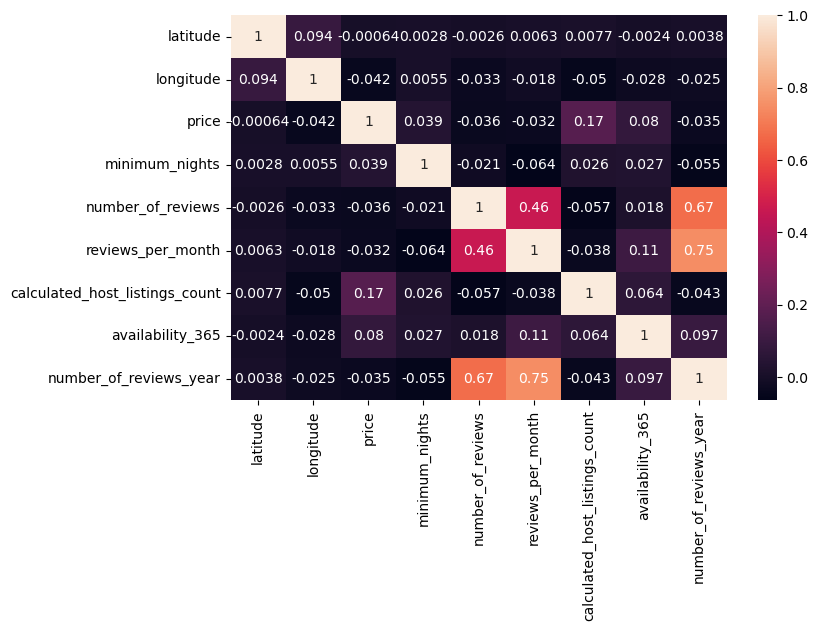

In [86]:
plt.figure(figsize=(8,5))
sns.heatmap(df[df.select_dtypes(include=['number']).columns].corr(),annot=True)
plt.show()

correlation coefficient between <b>Price</b> and <b>availability_365</b> positive corelation, mean when <b>availability_365 increase</b> then <b>  price increase</b><br>   
correlation coefficient between <b>Price</b> and <b>calculated_host_listings_count</b> positive corelation, mean when <b>calculated_host_listings_count increase</b> then <b>  price increase</b><br>
correlation coefficient between <b>Price</b> and <b>minimum_nights</b> positive corelation, mean when <b>minimum_nights increase</b> then <b>  price increase</b><br>   
correlation coefficient between <b>Price</b> and <b>number_of_reviews & reviews_per_month</b> negative corelation, mean when <b>number_of_reviews & reviews_per_month increase</b> then <b>  price decrease</b><br>   

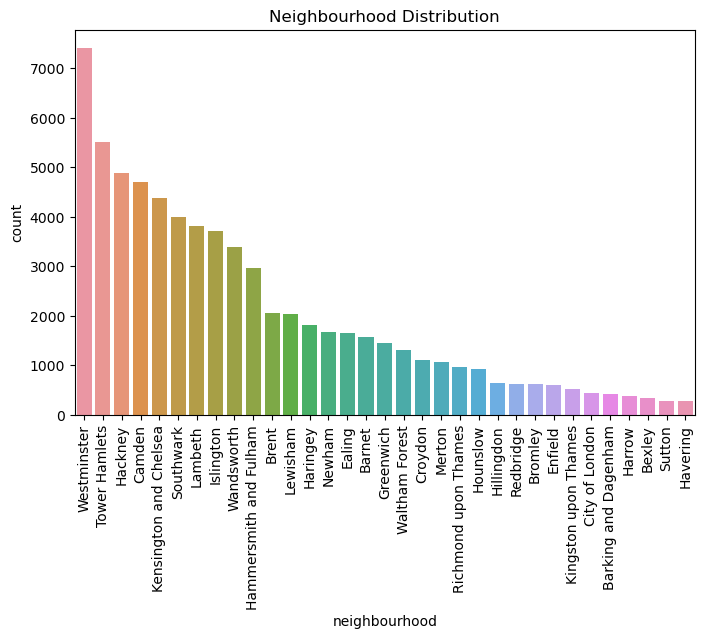

In [89]:
plt.figure(figsize=(8,5))
sns.countplot(x='neighbourhood', data=df, order=df['neighbourhood'].value_counts().index)
plt.title("Neighbourhood Distribution")
plt.xticks(rotation=90)
plt.show()

<b>Wethminster</b> is the most common neighborhoods in the dataset<br>
<b>havering</b> is the least common neighborhoods in the dataset<br>
Westminster is the most common neighborhood in the dataset. Is this because its prices are cheap, or because there is a high demand for the types of rooms available in it?
It could also be due to its high availability throughout the year (availability 365)

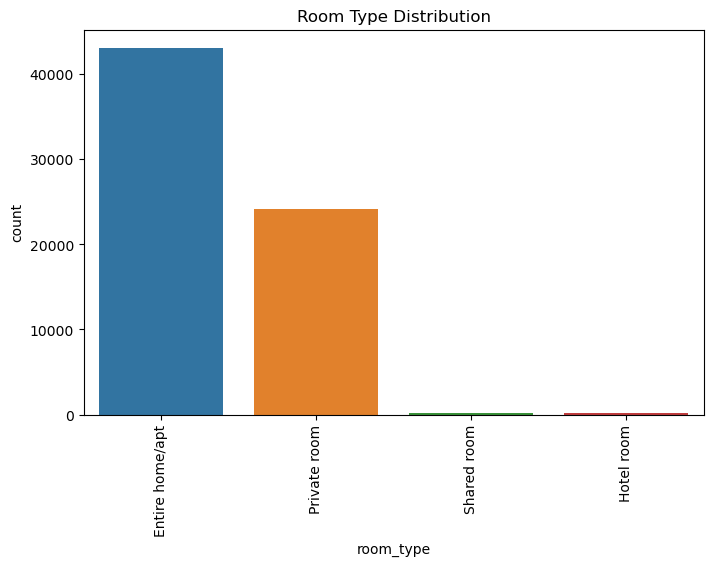

In [91]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['room_type'], data=df, order=df['room_type'].value_counts().index)
plt.title("Room Type Distribution")
plt.xticks(rotation=90)
plt.show()

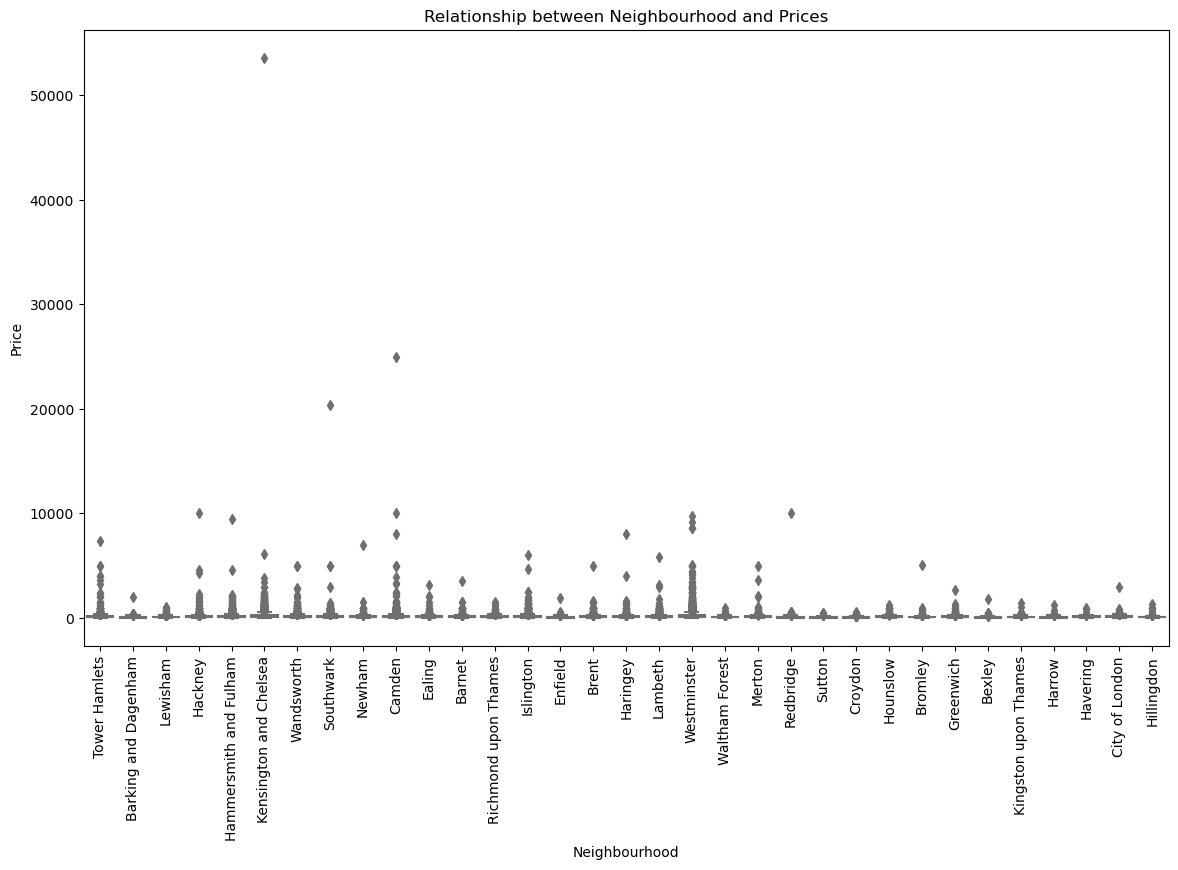

In [92]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood', y='price', data=df, palette='pastel')
plt.title('Relationship between Neighbourhood and Prices')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.show()

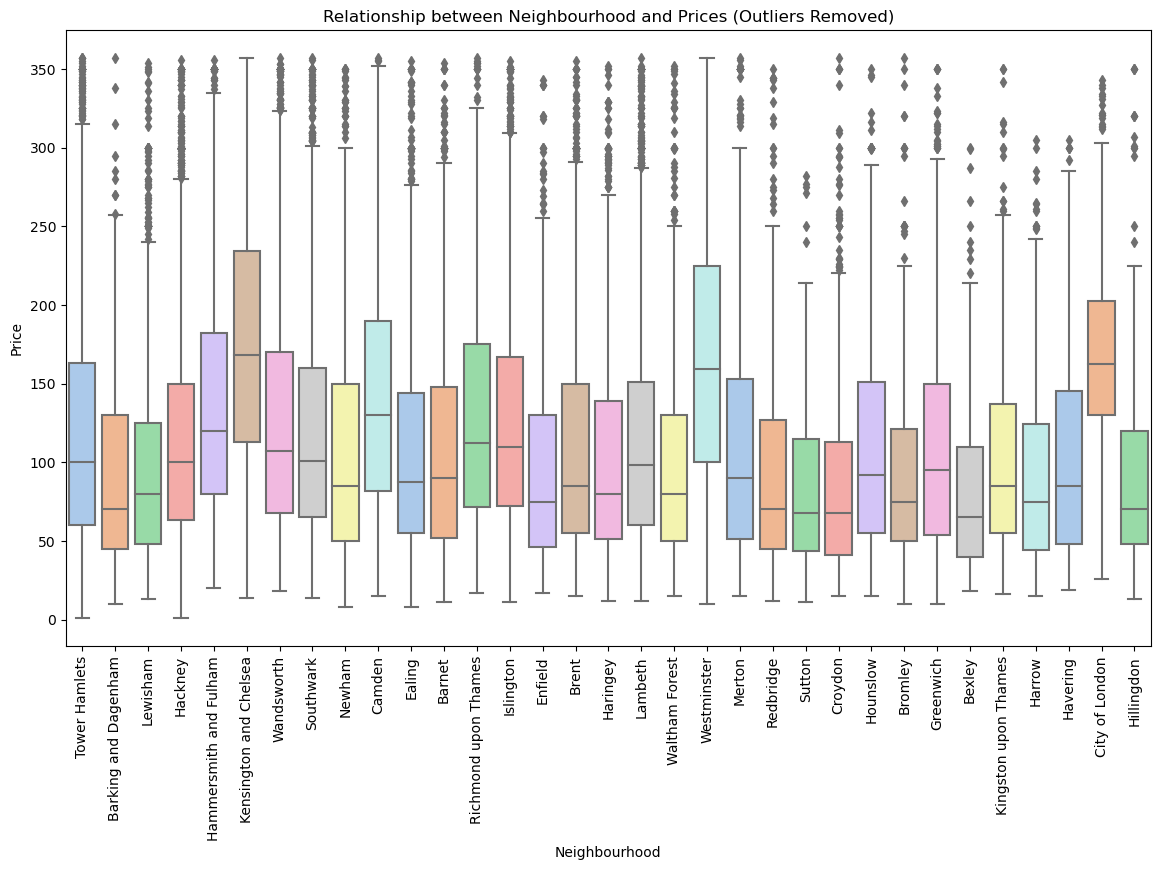

In [93]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['price'] < lower_bound) | (df['price'] > upper_bound)

plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood', y='price', data=df[~outliers], palette='pastel')
plt.title('Relationship between Neighbourhood and Prices (Outliers Removed)')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.show()

The price is not the main factor in the neighborhood's popularity

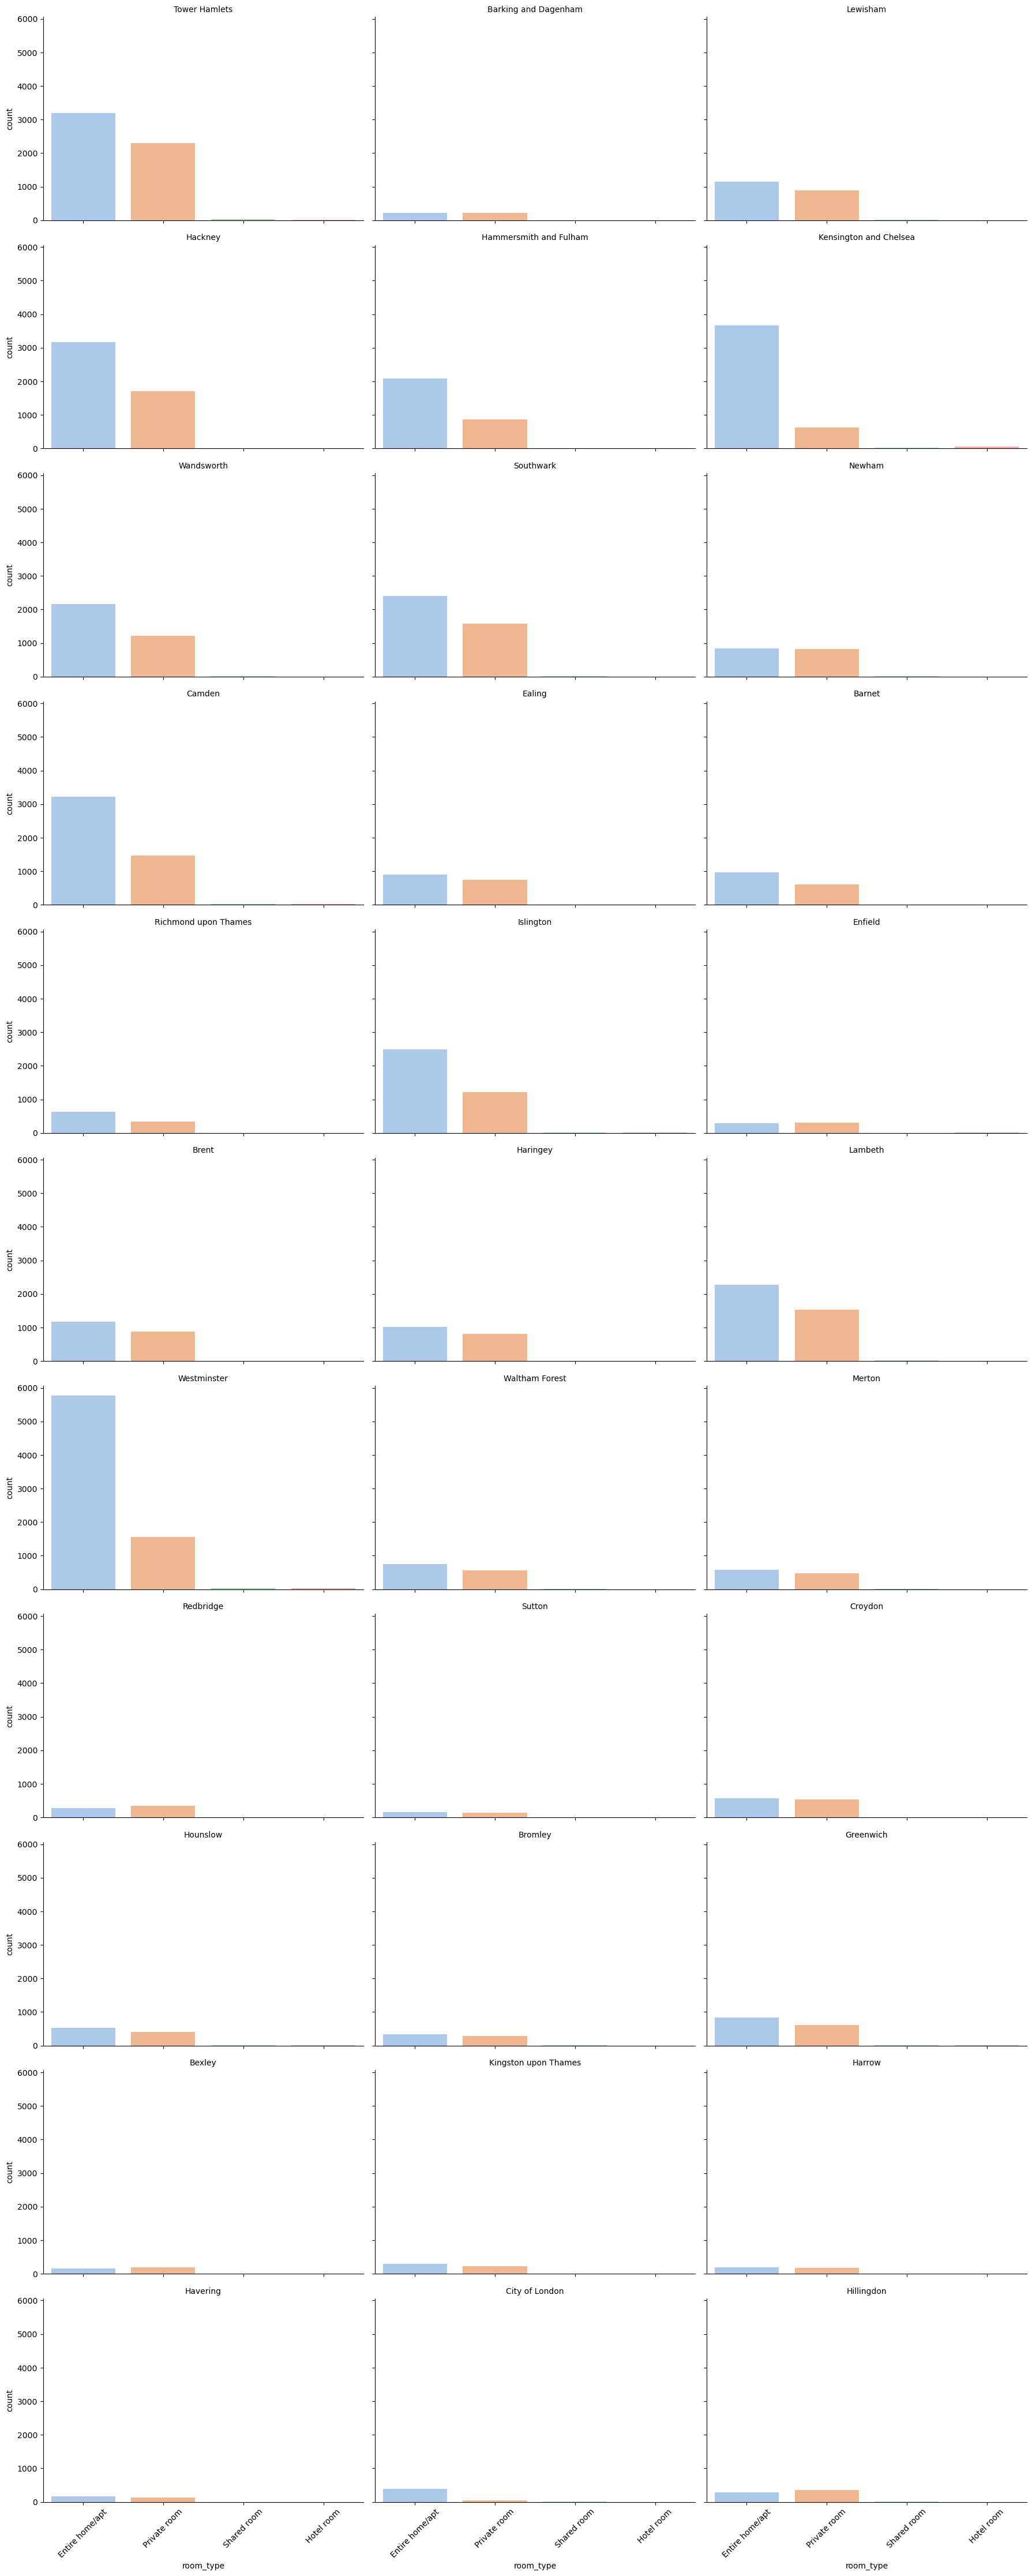

In [101]:
room_type_order = df['room_type'].value_counts().index
g = sns.FacetGrid(df, col="neighbourhood", col_wrap=3, height=4, aspect=1.5)
g.map(sns.countplot, "room_type", order=room_type_order, palette='pastel')

g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)

plt.show()

The room type is not the primary factor in the neighborhood's popularity

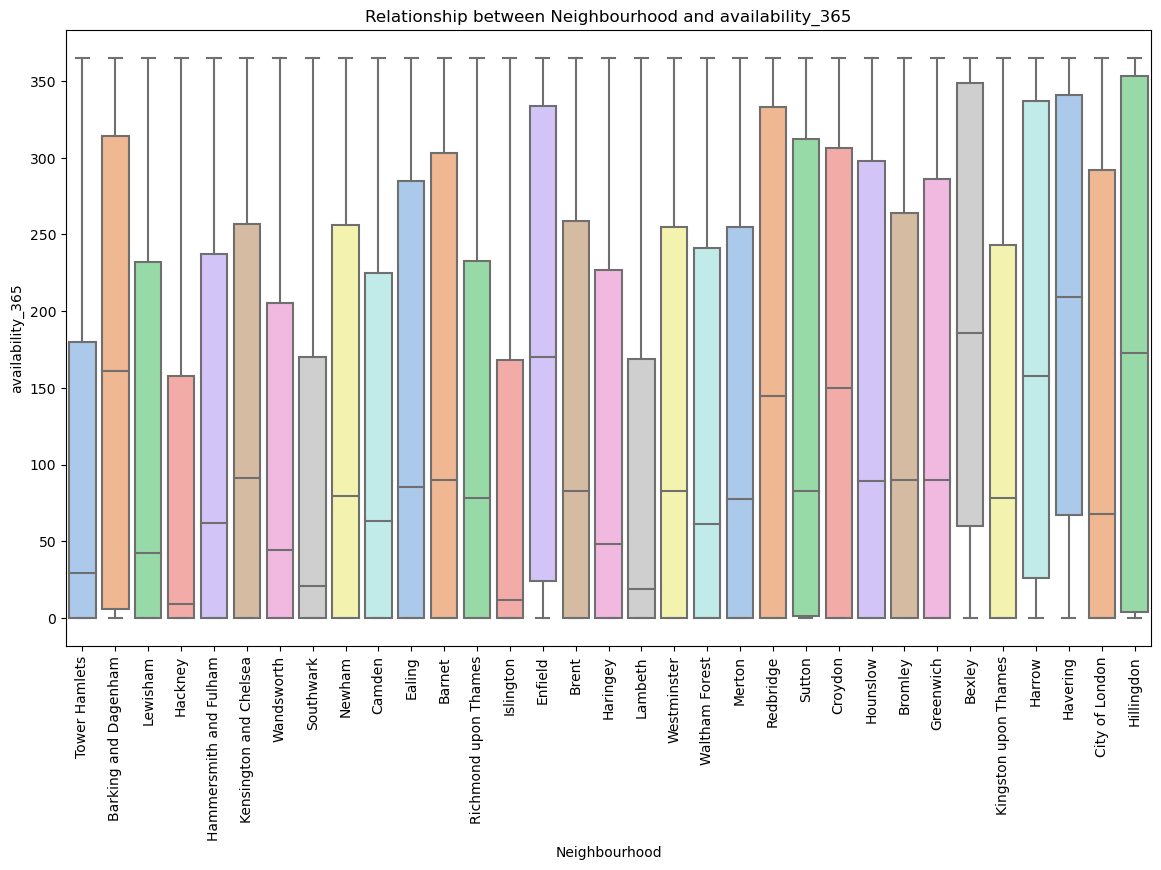

In [102]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood', y='availability_365', data=df, palette='pastel')
plt.title('Relationship between Neighbourhood and availability_365')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('availability_365')
plt.show()

Text(0.5, 1.0, 'Total Number of Reviews against Neighbourhoods')

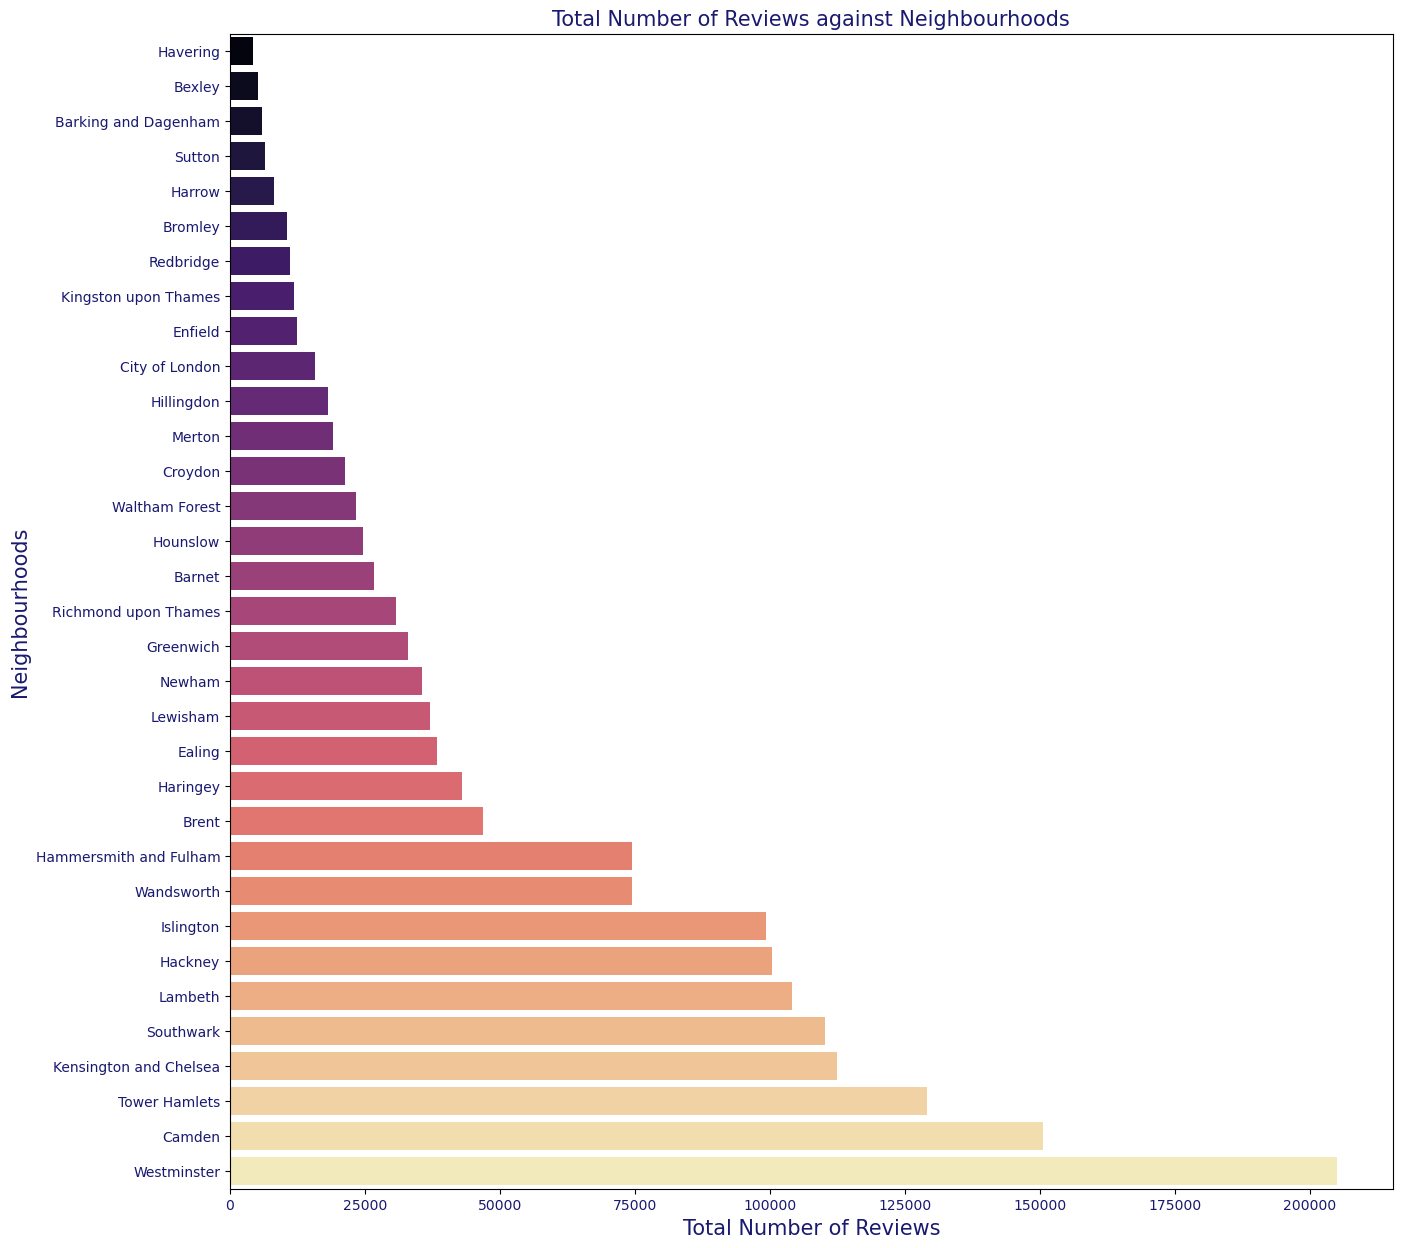

In [104]:
pfa = df[['neighbourhood','number_of_reviews']].groupby(['neighbourhood']).sum().reset_index().sort_values('number_of_reviews')
plt.figure(figsize = (15,15))
sns.barplot(y = 'neighbourhood', x = 'number_of_reviews', data = pfa, palette = 'magma')
plt.xlabel('Total Number of Reviews', size = 15, color='midnightblue')
plt.ylabel('Neighbourhoods', size = 15, color='midnightblue')
plt.xticks(color='midnightblue')
plt.yticks(color='midnightblue')
plt.title('Total Number of Reviews against Neighbourhoods', size = 15, color='midnightblue')

Westminster is the most common neighborhood in the dataset. This could be because it likely has a high number of positive reviews, which contributes to its popularity. Additionally, it may have a high demand for rooms type (Entire home/apt)  , which drives up prices, making it one of the most expensive neighborhoods.